In [1]:
import os
import sys
sys.path.insert(0, os.path.join("..", "app"))
import dataset
import json
import numpy as np
from collections import namedtuple


In [2]:
meta = open(os.path.join("..", "files", "meta", "datasets.json"), encoding="utf-8").read()
meta = json.loads(meta)

In [3]:
def metrics(_all, processed, valid):
    return valid * _all / processed

In [4]:
def format_name(from_meta):
    return from_meta.replace(":", "_")

In [5]:
item = namedtuple("dataset", "preposition metrics")
def for_property(prop):
    for ds in meta["datasets_meta"]:
        _, preposition, _, p = format_name(ds["name"]).split("_")
        if p != prop:
            continue
        try:
            d = dataset.Dataset(format_name(ds["name"]), "..")
            valid = d.get_matches_count()
            yield item(preposition, metrics(ds["allMatches"], ds["processedMatches"], valid))
        except FileNotFoundError:
            pass # В таблице не участвует

In [13]:
doubling = [p for p in for_property('ДвРефлексивИнтерпозиция')]
doubling_metrics = [x.metrics for x in doubling]
doubling_normalized_metrics = doubling_metrics / np.linalg.norm(doubling_metrics)
sortable = [item(doubling[n].preposition, doubling_normalized_metrics[n]) for n, x in enumerate(doubling)]
for x in sorted(sortable, key=lambda x: x.metrics, reverse=True):
    print(x.preposition, x.metrics)

по 0.9822579521191659
с 0.15962487435920714
за 0.05407278850384031
в 0.051469558967760544
на 0.04229849732746297
для 0.033859865182166674
от 0.020271881190758827
про 0.017004208399467733
о 0.012889261699829504
над 0.0123594945151635
у 0.00874761950817538
к 0.005793513053982891
из 0.005214161748584602
перед 0.004827927544985742
до 0.0007724684071977188
под 0.0005793513053982891
через 0.00025748946906590625
при 0.00012874473453295312


In [7]:
import seaborn as sns

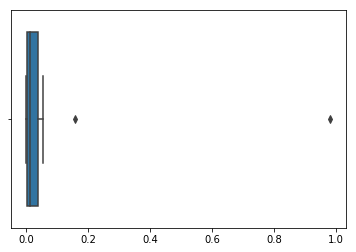

In [12]:
sns.boxplot(x = [p.metrics for p in sortable])